## Diwali Sales Analysis

In [6]:
# importing important libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [7]:
# Load the Diwali Sales Data CSV file

diwali = pd.read_csv(r"D:\Diwali Sales Data.csv"na_values)

In [8]:
diwali.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [9]:
diwali.shape

(11251, 15)

In [10]:
diwali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [11]:
# dropping unwanted columns with no data

diwali.drop(["Status","unnamed1"],axis=1,inplace=True)

In [12]:
# checking if there is any null value or not

pd.isnull(diwali).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [13]:
diwali[diwali.isnull().any(axis=1)]

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN
14,1003858,Cano,P00293742,M,46-50,46,1,Madhya Pradesh,Central,Hospitality,Auto,3,NaN
16,1005447,Amy,P00275642,F,46-50,48,1,Andhra Pradesh,Southern,IT Sector,Auto,3,NaN
109,1005265,Sakshi,P00296242,F,46-50,48,1,Delhi,Central,Banking,Footwear & Shoes,1,NaN
111,1005261,Apoorva,P00057942,F,36-45,41,1,Delhi,Central,IT Sector,Footwear & Shoes,2,NaN
184,1005538,Kartik,P00269542,F,46-50,49,1,Karnataka,Southern,Banking,Footwear & Shoes,1,NaN
293,1000326,Jonathan,P00120542,M,51-55,53,0,Gujarat,Western,IT Sector,Footwear & Shoes,3,NaN
344,1002507,Lakshmi,P00045842,F,26-35,35,1,Gujarat,Western,Chemical,Furniture,1,NaN
345,1004498,Srishti,P00030842,F,51-55,55,0,Delhi,Central,Textile,Footwear & Shoes,1,NaN
452,1004601,Gaurav,P00014442,F,36-45,40,1,Madhya Pradesh,Central,Hospitality,Food,4,NaN


In [14]:
# droping all the null value

diwali.dropna(inplace=True)

In [15]:
# changing data type

diwali["Amount"]=diwali["Amount"].astype("int")

In [16]:
diwali["Amount"].dtypes

dtype('int32')

In [17]:
diwali[["Age","Orders","Amount"]].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


### Exploratory Data Analysis

# Gender

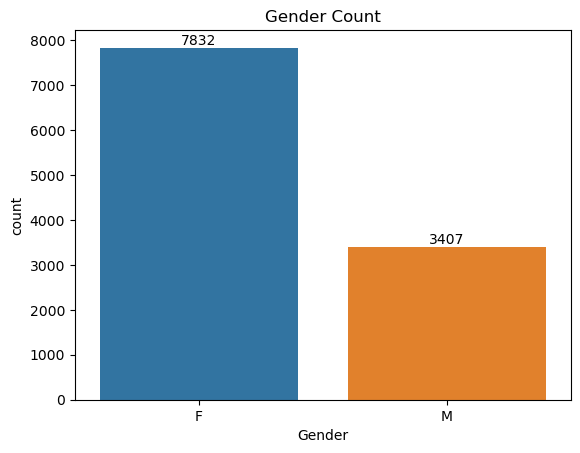

In [306]:
ax =sns.countplot(x="Gender",data=diwali,hue = "Gender")
for bars in ax.containers:
    ax.bar_label(bars)

plt.title("Gender Count")
plt.show()

In [22]:
diwali.groupby(["Gender"],as_index = False)["Amount"].sum().sort_values(by="Amount",ascending = False)

,Gender,Amount
0,F,74335853
1,M,31913276


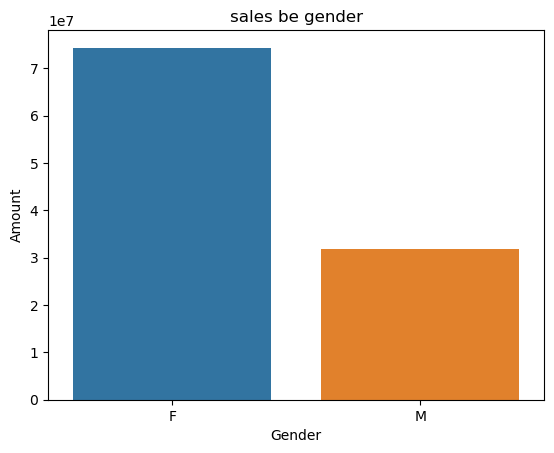

In [304]:
sales_by_gender = diwali.groupby(["Gender"],as_index = False)["Amount"].sum().sort_values(by="Amount",ascending = False)

sns.barplot(x="Gender",y="Amount",hue="Gender",data=sales_by_gender)
plt.gca().set(title = "sales be gender")
plt.show()

# Age

In [58]:
diwali.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

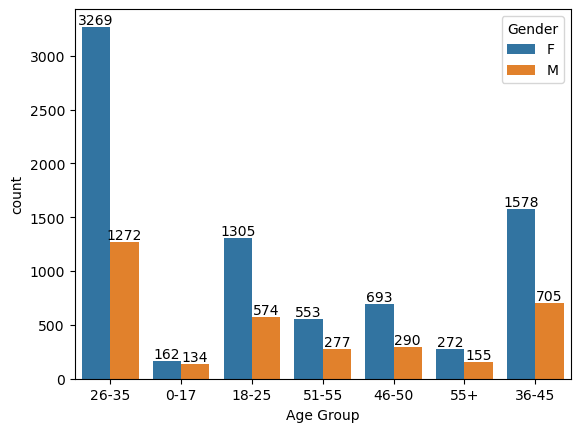

In [68]:
ac = sns.countplot(x="Age Group",hue="Gender",data=diwali)
for bars in ac.containers:
    ac.bar_label(bars)

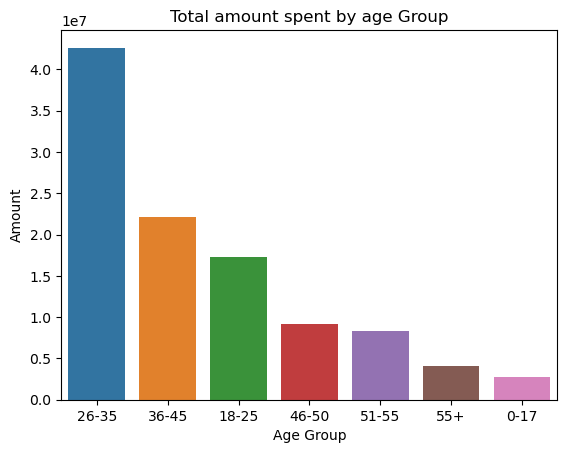

In [298]:
# Total amount vs Age Group
Sales_age = diwali.groupby(["Age Group"],as_index = False).sum().sort_values(by="Amount",ascending = False)

sns.barplot(x="Age Group",y="Amount",data=Sales_age,hue="Age Group")
plt.gca().set(title="Total amount spent by age Group")
plt.show()

# State

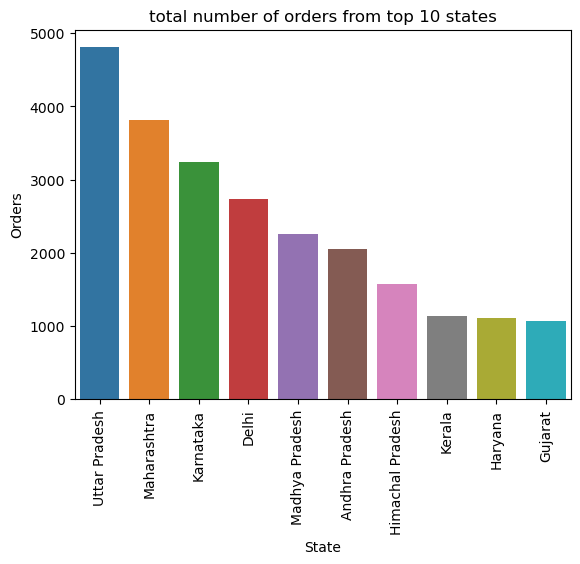

In [296]:
# total number of orders from top 10 states

sales_state = diwali.groupby(["State"],as_index = False)["Orders"].sum().sort_values(by="Orders",ascending = False).head(10)

bar_plot = sns.barplot(x="State",y="Orders",data=sales_state,hue="State")
plt.gca().set(title="total number of orders from top 10 states")
plt.xticks(rotation=90)
plt.show()

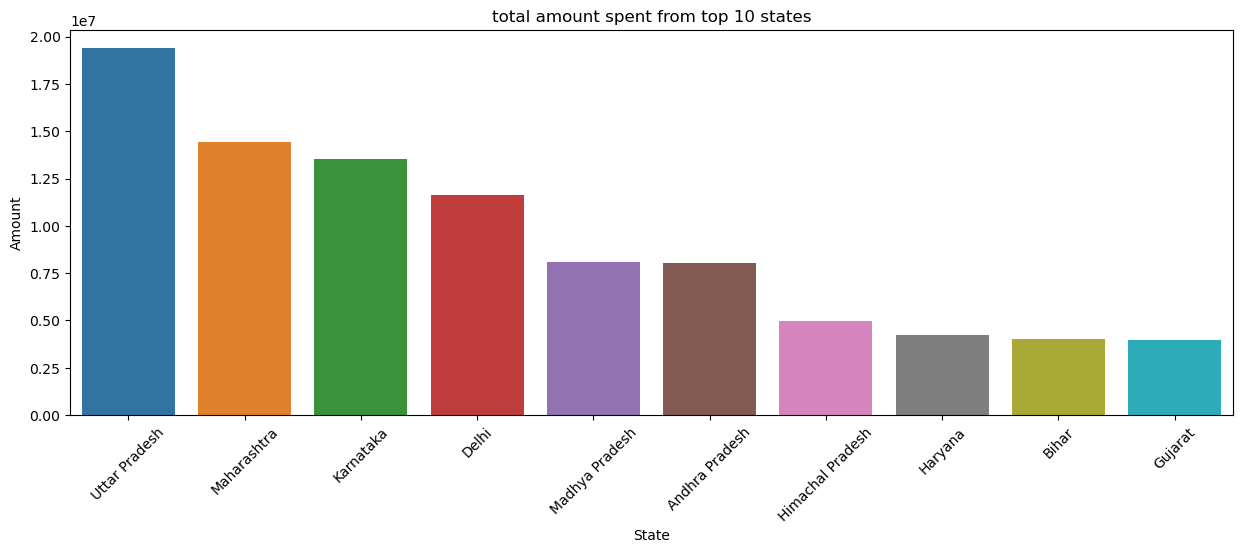

In [294]:
# total amount spent from top 10 states

sales_state = diwali.groupby(["State"],as_index = False)["Amount"].sum().sort_values(by="Amount",ascending = False).head(10)

plt.figure(figsize=(15, 5))
sns.barplot(x="State",y="Amount",data=sales_state,hue="State")
plt.gca().set(title="total amount spent from top 10 states")
plt.xticks(rotation=45)
plt.show()

# Marital Status

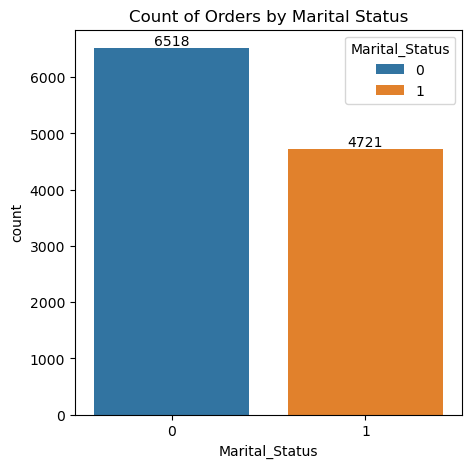

In [292]:
plt.figure(figsize=(5, 5))
ab = sns.countplot(x = "Marital_Status",data=diwali,hue="Marital_Status")
plt.title("Count of Orders by Marital Status")
for bars in ab.containers:
    ab.bar_label(bars)

In [187]:
diwali.groupby(["Marital_Status"],as_index= False)["Amount"].sum().sort_values(by="Amount",ascending=False)

,Marital_Status,Amount
0,0,62125384
1,1,44123745


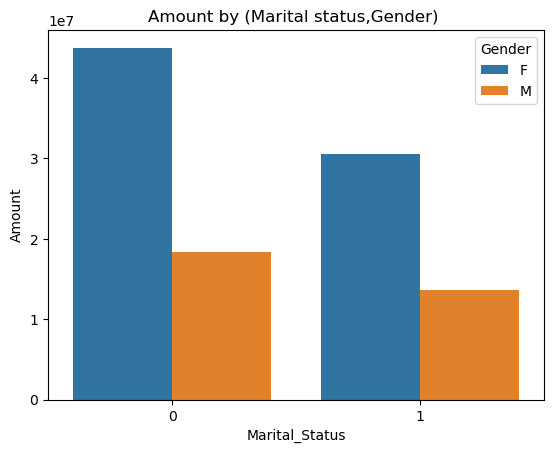

In [324]:
dd = diwali.groupby(["Marital_Status","Gender"],as_index= False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sns.barplot(x="Marital_Status",y="Amount",data=dd,hue="Gender")
plt.title("Amount by (Marital status,Gender) ")
plt.show()

# occupation

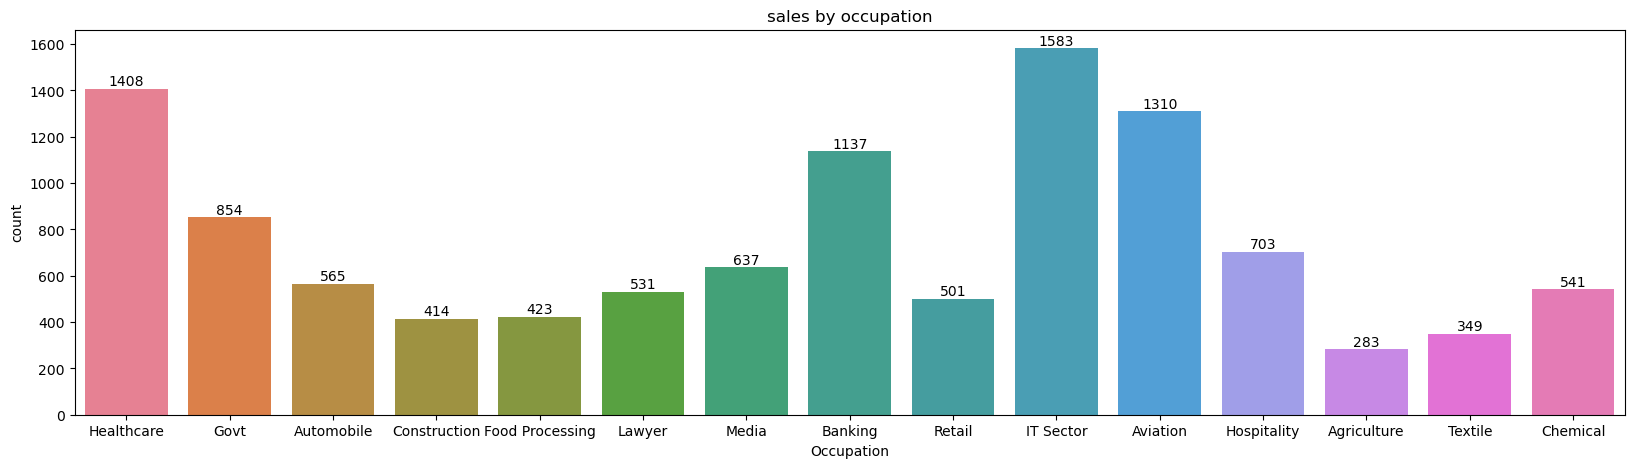

In [310]:
plt.figure(figsize=(20, 5))
ax = sns.countplot(x="Occupation",data=diwali,hue="Occupation")
plt.title("sales by occupation")
for bars in ax.containers:
    ax.bar_label(bars)

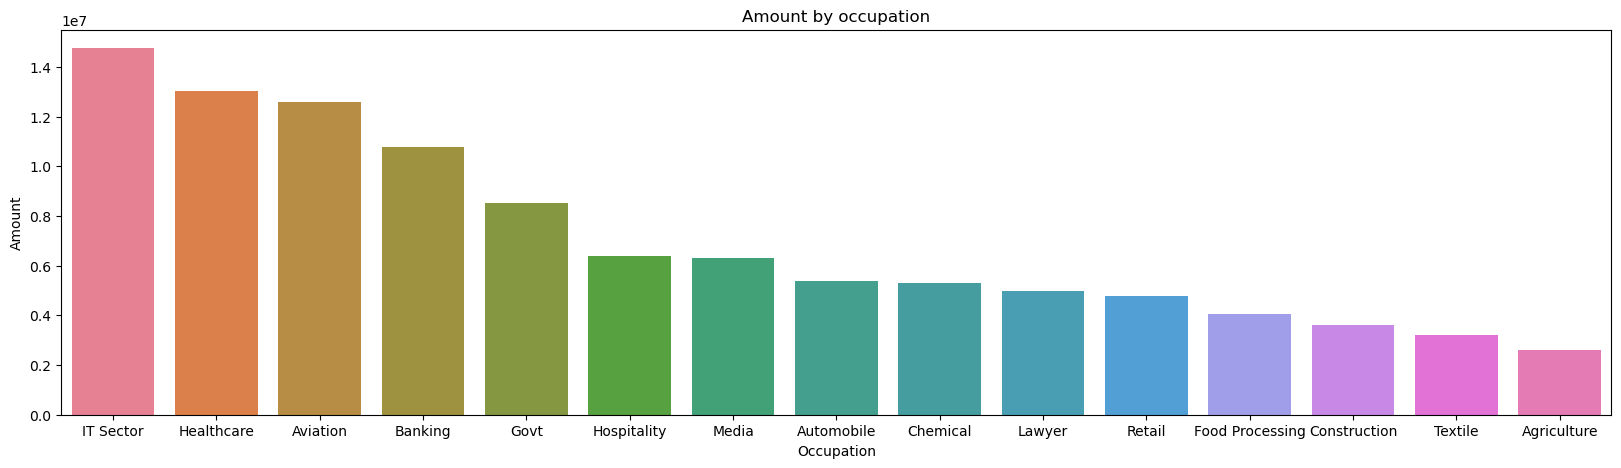

In [322]:
sales_oc = diwali.groupby(["Occupation"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)

plt.figure(figsize=(20, 5))
sns.barplot(data=sales_oc,x="Occupation",y="Amount",hue="Occupation")
plt.title("Amount by occupation")
plt.show()

# Product category

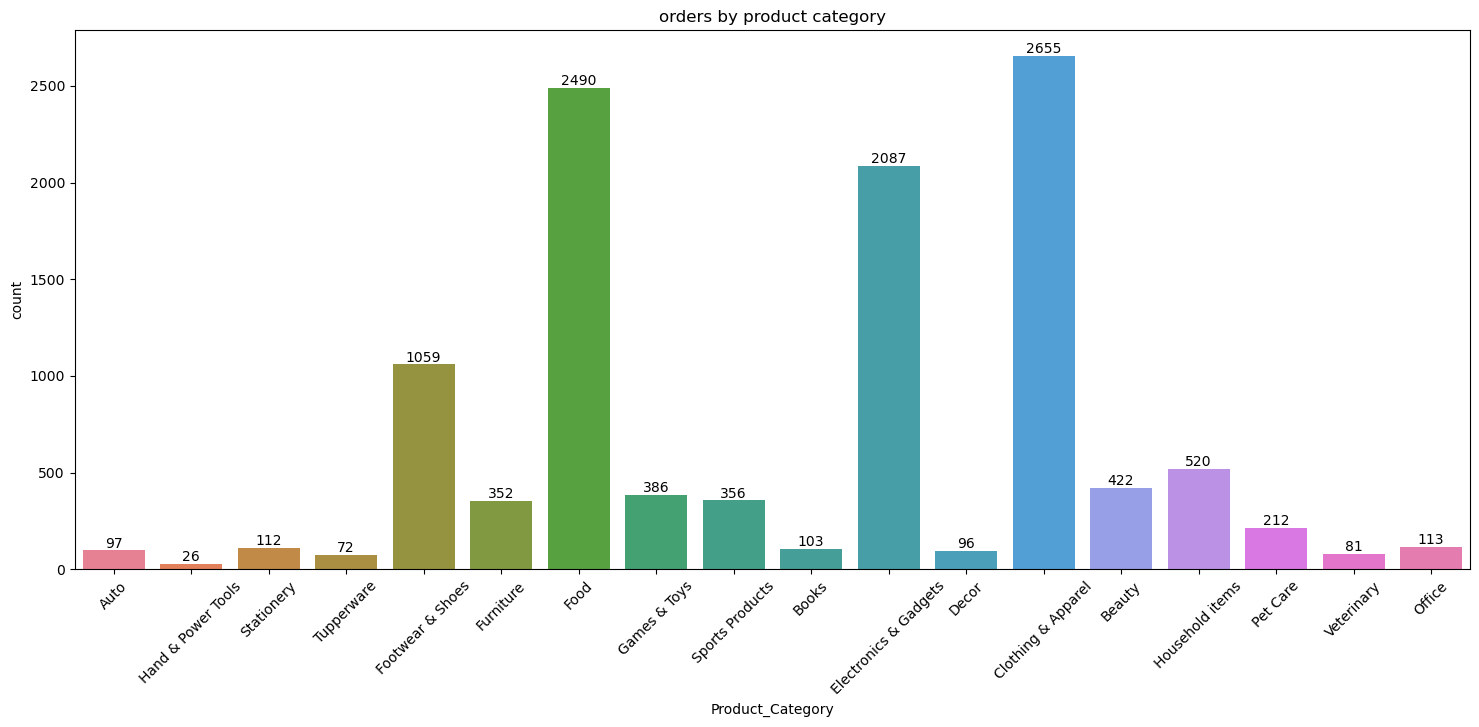

In [318]:
plt.figure(figsize=(18, 7))
ax = sns.countplot(x="Product_Category",data=diwali,hue="Product_Category")
plt.title("orders by product category" )
plt.xticks(rotation=45)
for bars in ax.containers:
    ax.bar_label(bars)

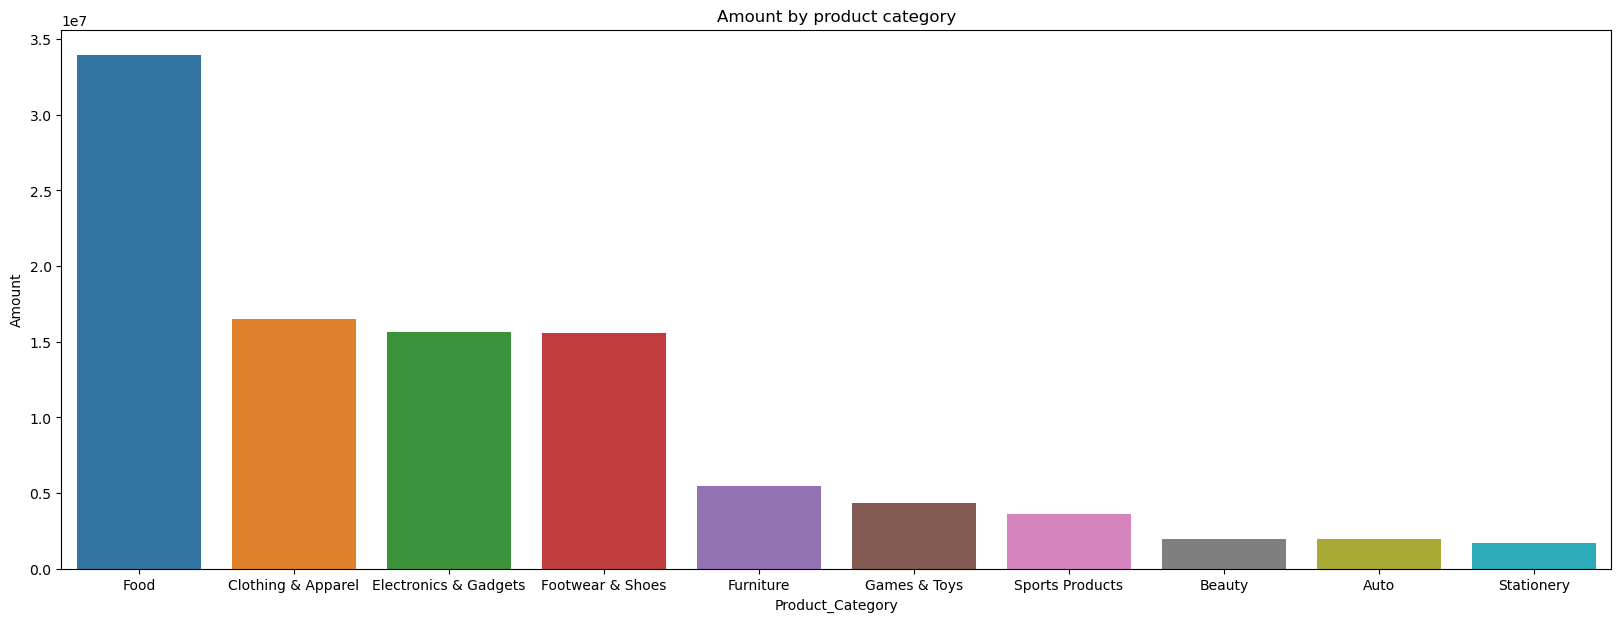

In [320]:
gg = diwali.groupby(["Product_Category"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(10)

plt.figure(figsize=(20,7))
sns.barplot(x="Product_Category",y="Amount",data=gg,hue="Product_Category")
plt.title("Amount by product category")
plt.show()

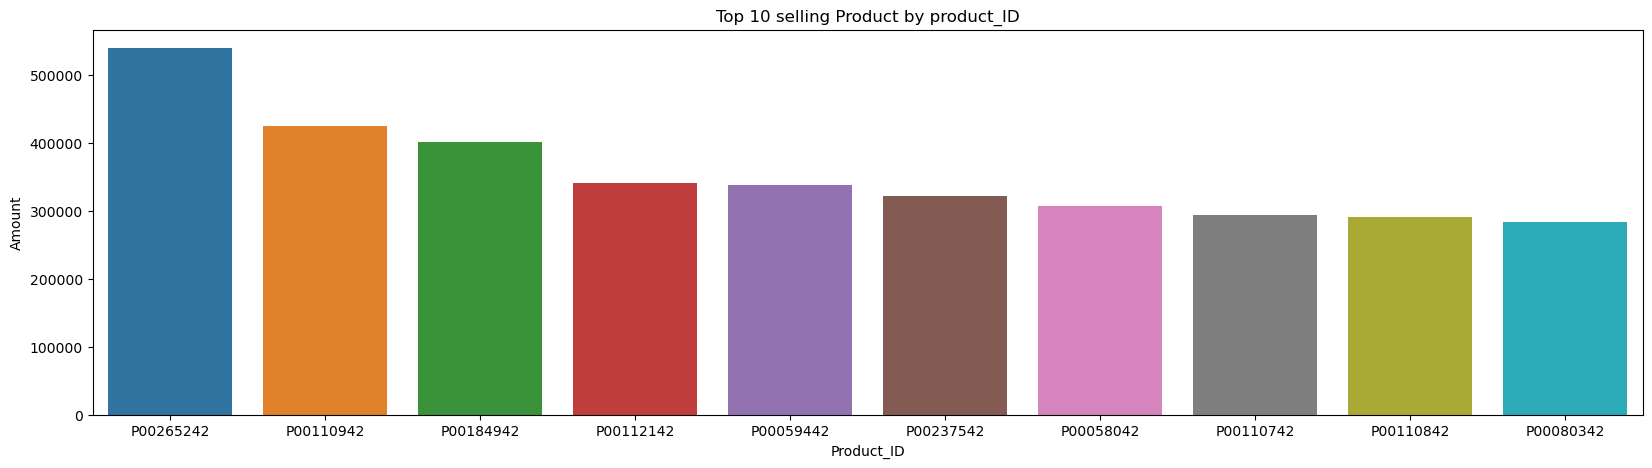

In [326]:
pp = diwali.groupby(["Product_ID"],as_index = False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(10)
plt.figure(figsize=(20,5))
sns.barplot(x="Product_ID",y="Amount",data=pp,hue="Product_ID")
plt.title("Top 10 selling Product by product_ID")
plt.show()